In [121]:
import pandas as pd
import numpy as np
import matplotlib as plt
import glob,re,pickle,os,yaml,datetime

In [88]:
debut=datetime.datetime.now()
filePrefix="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Longitudinales/"
sampleFiles=glob.glob(filePrefix+"Longitudinal*.csv")

In [89]:
def prefixEchantillon(numero):
    candidats=[]
    for sample in sampleFiles:
        m=re.match(ur"^.*/(Longitudinal-%s-T\d+-F\d+)%s-paradigmes\.csv"%(numero,casesType),sample)
        if m:
            candidats.append(m.group(1))
    if len(candidats)==1:
        return candidats[0]
    else:
        print "PB pas de nom unique correspondant",candidats

In [90]:
numeroEchantillon="40"
sampleType="-X"
casesType="-X-Morphomes"
etapeSwim="-Swim2"
samplePrefix=prefixEchantillon(numeroEchantillon)
initialFile=filePrefix+samplePrefix+"-X-paradigmes.csv"
analysisPrefix=filePrefix+samplePrefix+casesType
predictionsFile=analysisPrefix+"-paradigmes%s.csv"%etapeSwim
print predictionsFile
referenceFile="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/MGC-171229-Verbes3.pkl"
referenceFile="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Samples/MGC-171229-Verbes3.pkl"
referenceFile="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Samples/MGC-160104-Verbes2.pkl"


/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Longitudinales/Longitudinal-40-T410000-F28780-X-Morphomes-paradigmes-Swim2.csv


## Réglages de la variante phonologique

In [91]:
phonologicalMap=sampleType.strip("-")
neutralisationsNORD=(u"6û",u"9ê")
neutralisationsSUD=(u"e2o",u"E9O")
if phonologicalMap=="N":
    neutralisations=neutralisationsNORD
elif phonologicalMap=="S":
    neutralisations=neutralisationsSUD
else:
    neutralisations=(u"",u"")
    phonologicalMap=("X")
bdlexiqueIn = unicode(u"èò"+neutralisations[0])
bdlexiqueNum = [ord(char) for char in bdlexiqueIn]
neutreOut = unicode(u"EO"+neutralisations[1])
neutralise = dict(zip(bdlexiqueNum, neutreOut))

In [92]:
def recoder(chaine,table=neutralise):
    if type(chaine)==str:
        temp=unicode(chaine.decode('utf8')).translate(table)
        result=temp.encode('utf8')
    elif type(chaine)==unicode:
        result=chaine.translate(table)
    else:
        result=chaine
    return result

In [93]:
dierese={"j":"ij", "w":"uw","H":"yH","i":"ij","u":"uw","y":"yH"}

In [94]:
def checkFrench(prononciation):
    if prononciation:
        result=recoder(prononciation)
        m=re.match(ur"^.*([^ieèEaOouy926êôâ])[jwH]$",result)
        if m:
            print ("pb avec un glide final", prononciation)
        m=re.match(ur"(.*[ptkbdgfsSvzZ][rl])([jwH])(.*)",result)
        if m:
            n=re.search(ur"[ptkbdgfsSvzZ][rl](wa|Hi|wê)",result)
            if not n:
                glide=m.group(2)
                result=m.group(1)+dierese[glide]+m.group(3)
        m=re.match(ur"(.*)([iuy])([ieEaOouy].*)",result)
        if m:
            glide=m.group(2)
            result=m.group(1)+dierese[glide]+m.group(3)
        result=result.replace("Jj","J")
    else:
        result=prononciation
    return result

## Formes de l'échantillon

In [168]:
def formesInitiales(n):
    numero="%02d"%n
    samplePrefix=prefixEchantillon(numero)
    initialFile=filePrefix+samplePrefix+"-X-paradigmes.csv"

    initialParadigmes=pd.read_csv(initialFile,sep=";",encoding="utf8")
    del initialParadigmes[u"Unnamed: 0"]
    initialParadigmes=initialParadigmes.dropna(axis=1,how='all')
    initialParadigmesColumns=initialParadigmes.columns.tolist()
    listeLexemes=initialParadigmes["lexeme"].tolist()
    nbLexemes=len(listeLexemes)

    initialForms=pd.melt(initialParadigmes[initialParadigmes["lexeme"].isin(listeLexemes)],id_vars=["lexeme"]).dropna()
    initialForms["lexeme-case"]=initialForms["lexeme"]+"-"+initialForms["variable"]
    initialForms.drop(labels=["lexeme","variable"],axis=1,inplace=True)
    initialForms.set_index(["lexeme-case"],inplace=True)
    initialFormsIndex=initialForms.index.tolist()
    
    initialParadigmes["nbCoCases"]=initialParadigmes.apply(lambda x: x.count(), axis=1)-1
    df=initialParadigmes[["lexeme","nbCoCases"]].groupby("nbCoCases").count()
    df.columns=[numero]
    df["p"+numero]=(100*df[numero]/df[numero].sum()).round(2)
    return df

### Calcul des coCases de l'échantillon initial

In [176]:
initialDistribution=[]
for numeroEchantillon in range(55):
    initialDistribution.append(formesInitiales(numeroEchantillon))
    analysisPrefix=filePrefix+samplePrefix+casesType
    predictionsFile=analysisPrefix+"-paradigmes%s.csv"%etapeSwim
#    print predictionsFile
    referenceFile="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/MGC-171229-Verbes3.pkl"
    referenceFile="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Samples/MGC-171229-Verbes3.pkl"
    referenceFile="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/Samples/MGC-160104-Verbes2.pkl"
#initialDistribution

In [170]:
initialDistribution[0]

,00,p00
nbCoCases,,
1,660,51.20
2,215,16.68
3,125,9.70
4,79,6.13
5,52,4.03
6,33,2.56
7,35,2.72
8,19,1.47
9,12,0.93


In [177]:
dfInit=pd.concat(initialDistribution,axis=1)
dfInit.sort_index(ascending=False,inplace=True)
rawCols=[c for c in dfInit.columns if not c.startswith("p")]
normCols=[c for c in dfInit.columns if c.startswith("p")]

In [178]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("poster")
sns.set_palette("husl")

In [179]:
bounds = np.array([0, 1, 3, 10, 30, 100, 300, 1000])
norm = plt.colors.BoundaryNorm(boundaries=bounds, ncolors=100)
def heatmap(df,norm=norm):
    fig, ax = plt.pyplot.subplots(figsize=(50,50)) 
    hm=sns.heatmap(df,cmap="Oranges",norm=norm,annot=True,fmt="g",cbar_kws={"ticks":bounds},ax=ax)
    plt.pyplot.show()

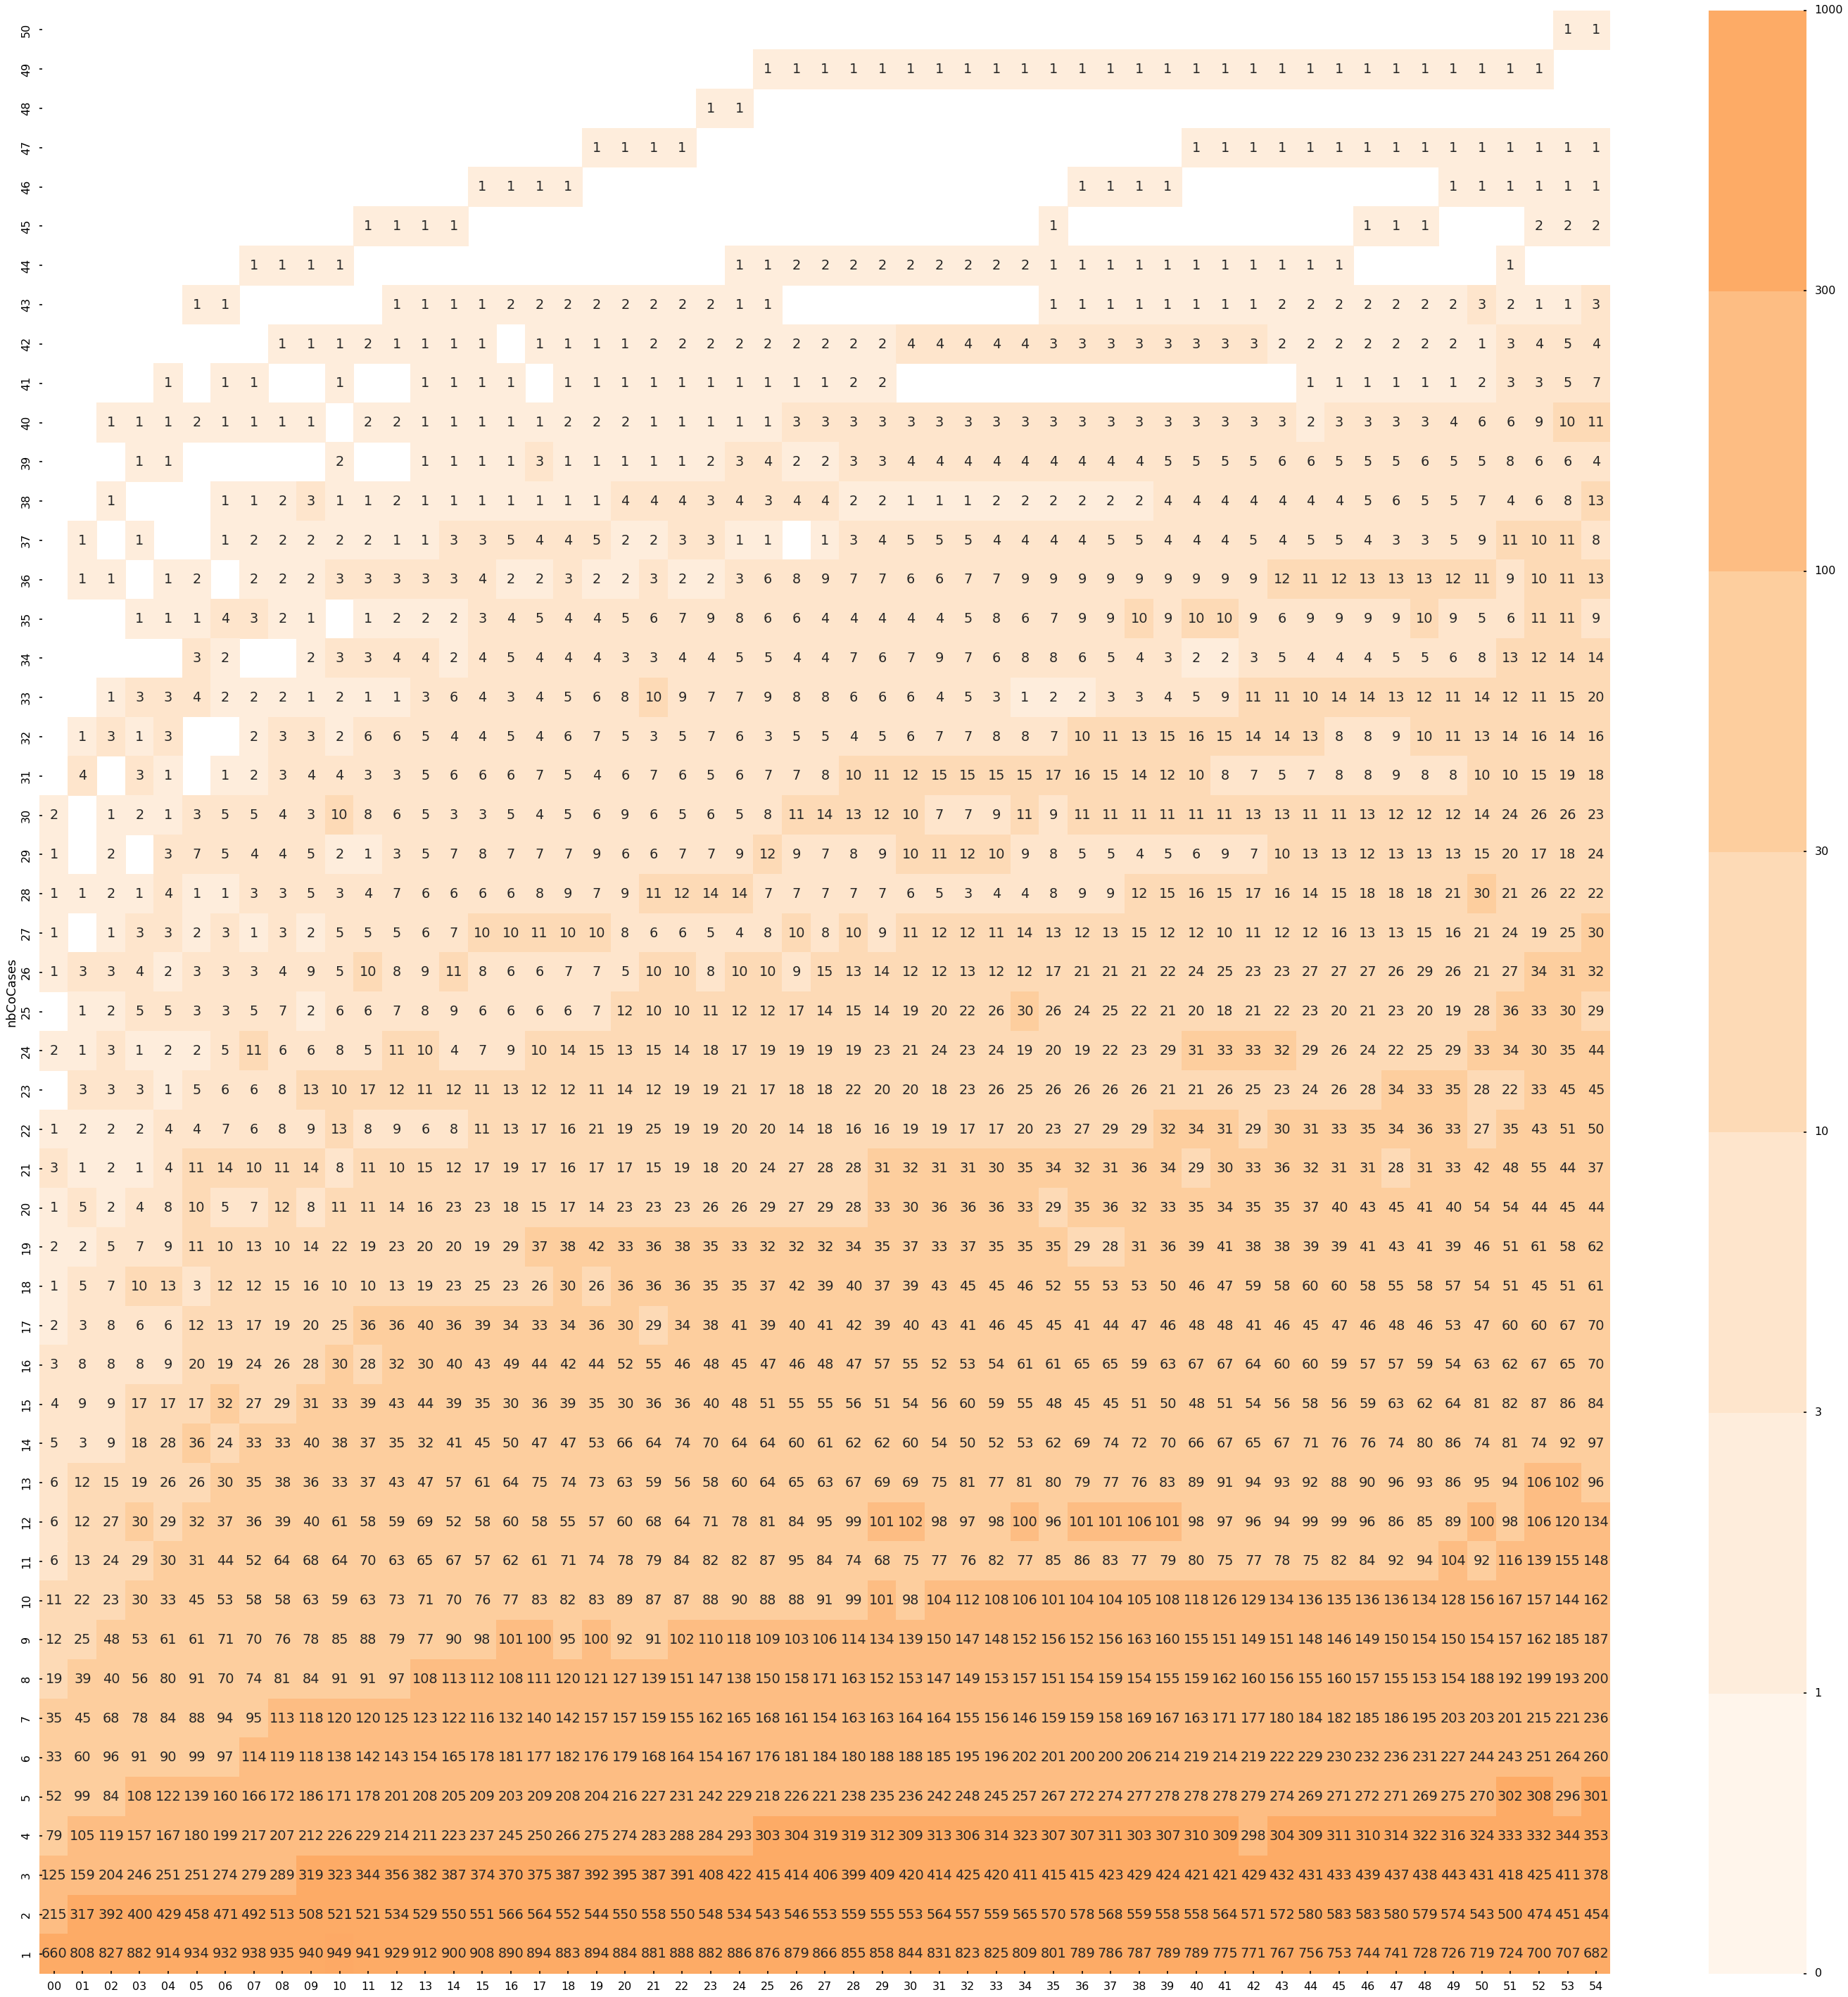

In [180]:
heatmap(dfInit[rawCols])

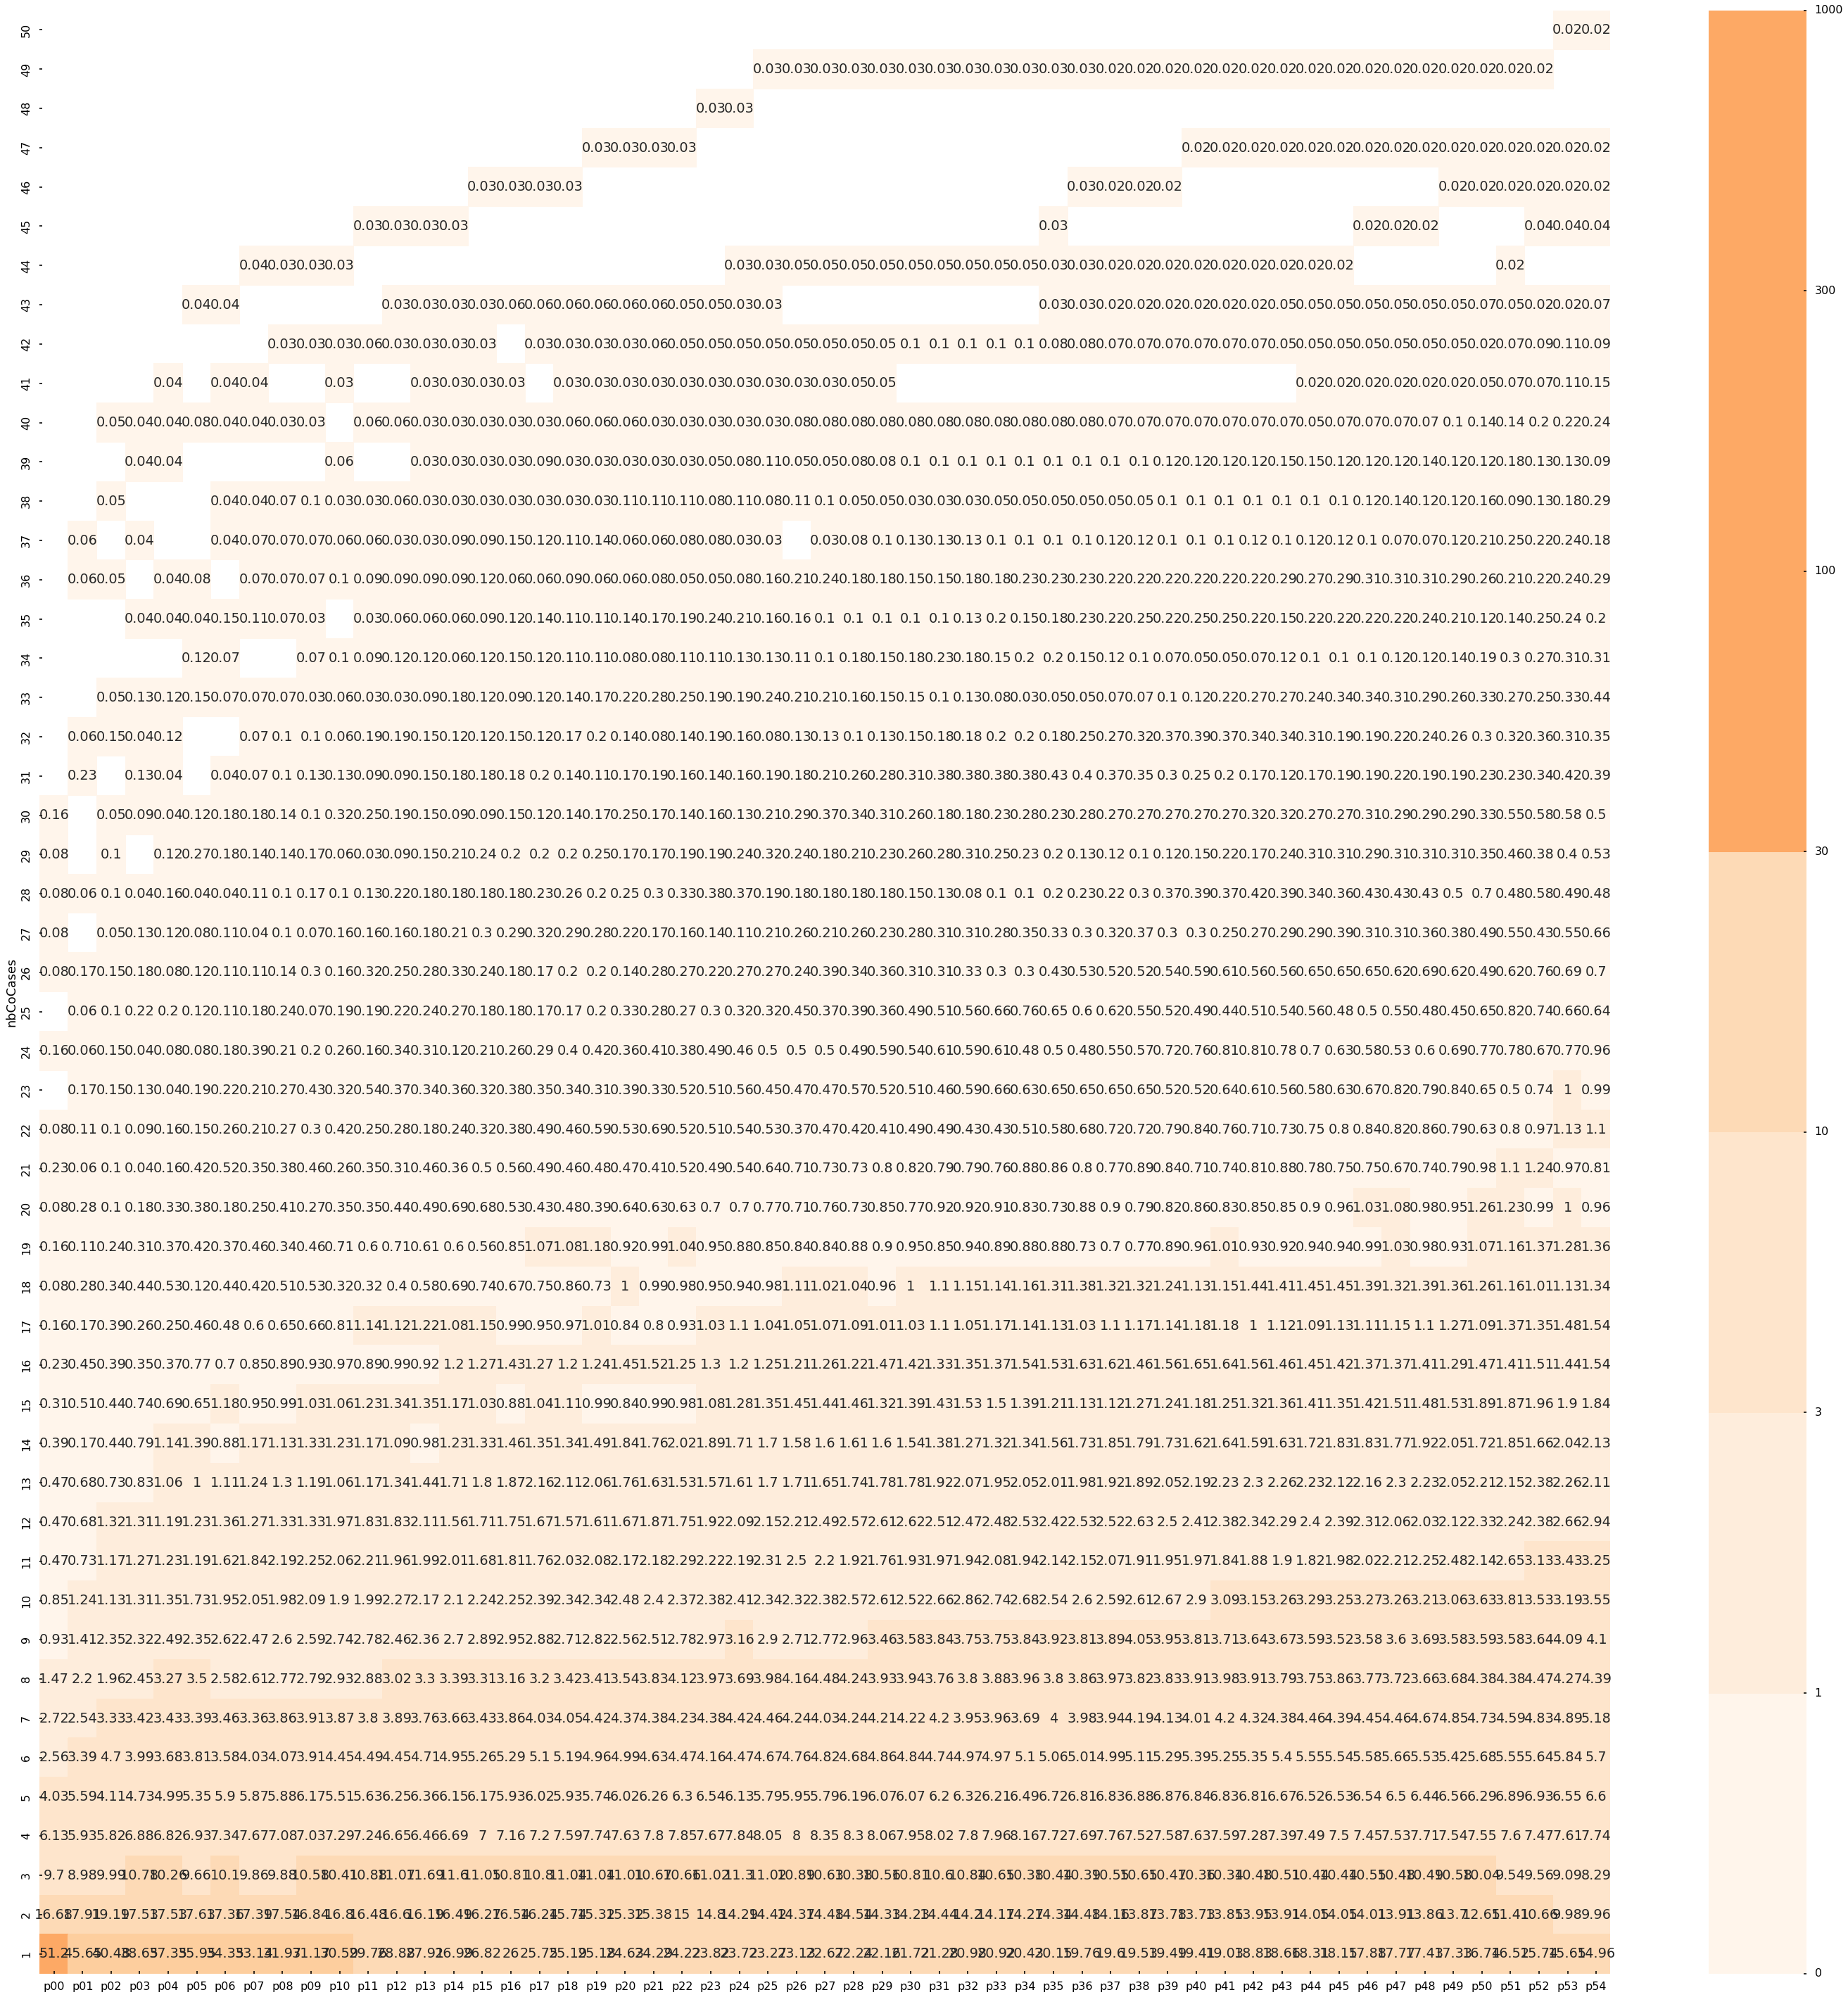

In [181]:
heatmap(dfInit[normCols])

In [77]:
dfInitialCoCases=[]
initialParadigmes["nbCoCases"]=initialParadigmes.apply(lambda x: x.count(), axis=1)-1
dfInitialCoCases.append(initialParadigmes[["lexeme","nbCoCases"]].groupby("nbCoCases").count())
dfInitialCoCases[0]

,lexeme
nbCoCases,
1,789
2,558
3,421
4,310
5,278
6,219
7,163
8,159
9,155


#### Cases surabondantes dans l'échantillon initial

In [78]:
initialForms[initialForms["value"].str.contains(",")].head()

,value
lexeme-case,
essayer-fi1P,"EsErô,EsEj6rô"
payer-fi1P,"pErô,pEj6rô"
essayer-fi1S,"EsErE,EsEj6rE"
payer-fi1S,"pErE,pEj6rE"
payer-fi2P,"pEre,pEj6re"


## Formes de l'échantillon avec les prédictions

In [79]:
predictedParadigmes=pd.read_csv(predictionsFile,sep=";",encoding="utf8")
del predictedParadigmes[u"Unnamed: 0"]
predictedParadigmes=predictedParadigmes.loc[:,predictedParadigmes.columns.isin(initialParadigmesColumns)].dropna(axis=1,how='all')
if listeLexemes!=predictedParadigmes["lexeme"].tolist():
    print "PB avec la liste des lexèmes prédits"
if set(initialParadigmesColumns)!=set(predictedParadigmes.columns.tolist()):
    print "PB avec la liste des cases prédites"
    print predictedParadigmes.columns.tolist()
    print initialParadigmesColumns

In [80]:
predictedForms=pd.melt(predictedParadigmes[predictedParadigmes["lexeme"].isin(listeLexemes)],id_vars=["lexeme"]).dropna()
predictedForms["lexeme-case"]=predictedForms["lexeme"]+"-"+predictedForms["variable"]
predictedForms.drop(labels=["lexeme","variable"],axis=1,inplace=True)
predictedForms.set_index(["lexeme-case"],inplace=True)
predictedFormsIndex=predictedForms.index.tolist()

### Calcul des coCases des formes prédites

In [81]:
dfPredictedCoCases=[]
predictedParadigmes["nbCoCases"]=predictedParadigmes.apply(lambda x: x.count(), axis=1)-1
dfPredictedCoCases.append(predictedParadigmes[["lexeme","nbCoCases"]].groupby("nbCoCases").count())
dfPredictedCoCases[0]

,lexeme
nbCoCases,
6,1
8,3
9,1
10,3
12,1
13,8
14,6
15,1
16,3


#### Cases surabondantes dans les formes prédites

In [82]:
predictedForms[predictedForms["value"].str.contains(",")].head()

,value
lexeme-case,
balayer-fi1P,"balEj6rô,balErô"
déconseiller-fi1P,"dEkôsEj6rô,dEkôsErô"
effrayer-fi1P,"EfrErô,EfrEj6rô"
essayer-fi1P,"EsEj6rô,EsErô"
frayer-fi1P,"frErô,frEj6rô"


## Formes de référence
- dans le lexique Gold
- seulement les cases qui font partie de l'échantillon initial
- seulement les lexèmes qui font partie de l'échantillon initial

In [83]:
with open(referenceFile,"rb") as input:
    lexiqueGold=pickle.load(input)

'''Rectifications phonologiques'''
lexiqueGold["phono"]=lexiqueGold["phono"].apply(lambda x: checkFrench(x))
completeParadigmes=pd.pivot_table(lexiqueGold, values='phono', index=['lexeme'], columns=['case'], aggfunc=lambda x: ",".join(x)).reset_index().reindex()

'''Identification des cases présentes initialement'''
completeParadigmes=completeParadigmes.loc[completeParadigmes["lexeme"].isin(listeLexemes),completeParadigmes.columns.isin(initialParadigmesColumns)]

- seulement les lexèmes qui font partie de l'échantillon initial

In [84]:
'''Mise en liste des formes de références'''
goldTestForms=pd.melt(completeParadigmes[completeParadigmes["lexeme"].isin(listeLexemes)],id_vars=["lexeme"]).dropna()
goldTestForms["lexeme-case"]=goldTestForms["lexeme"]+"-"+goldTestForms["case"]
goldTestForms.drop(labels=["lexeme","case"],axis=1,inplace=True)
goldTestForms.set_index(["lexeme-case"],inplace=True)

### Calcul des coCases des formes de référence

In [85]:
dfGoldCoCases=[]
completeParadigmes["nbCoCases"]=completeParadigmes.apply(lambda x: x.count(), axis=1)-1
dfGoldCoCases.append(completeParadigmes[["lexeme","nbCoCases"]].groupby("nbCoCases").count())
dfGoldCoCases[0]

case,lexeme
nbCoCases,
1,7
4,1
5,4
8,1
9,1
10,2
11,2
12,1
14,2


In [86]:
defectifsGold=completeParadigmes[completeParadigmes["nbCoCases"]<40]["lexeme"]
predictedParadigmes[predictedParadigmes["lexeme"].isin(defectifsGold)].values

array([[u'absoudre', nan, u'absudi', ..., u'absud', u'absud', 27],
       [u'abstraire', nan, nan, ..., u'abstras', u'abstras', 43],
       [u'advenir', nan, u'adv\xea', ..., u'advjEn', u'advjEn', 44],
       ..., 
       [u'\xe9cher', nan, u'ESE', ..., u'ES', u'ES', 43],
       [u'\xe9choir', nan, u'ESy', ..., u'ESwa', u'ESwa', 41],
       [u'\xe9clore', u'EklOim', u'EklOi', ..., u'EklO', u'EklO', 31]], dtype=object)

#### Cases surabondantes dans les formes Gold

In [ ]:
goldTestForms[goldTestForms["value"].str.contains(",")].head()

## Extraction des formes de références pertinentes
- formes qui sont absentes de l'échantillon initial

**ATTENTION AUX SURABONDANCES**

In [ ]:
'''Extraction des formes de références pertinentes'''
goldForms=goldTestForms.loc[~goldTestForms.index.isin(initialFormsIndex)]
goldFormsIndex=goldForms.index.tolist()

In [ ]:
def countSplits(dfForms):
    dfForms.loc[:,"split"]=dfForms.loc[:,"value"].str.split(",")
    return dfForms["split"].str.len().sum()


In [ ]:
'''Soustraire les formes initiales des prédictions'''
finalForms=predictedForms.loc[~predictedForms.index.isin(initialFormsIndex)]
finalFormsIndex=finalForms.index.tolist()

In [ ]:
nbInitialForms=countSplits(initialForms)
nbGoldForms=countSplits(goldForms)
print nbGoldForms, "formes à prédire à partir de",nbInitialForms,"formes de",nbLexemes,"lexèmes"

In [ ]:
'''Calculer les sur/sous-générations'''
underGeneration=goldForms.loc[~goldForms.index.isin(finalFormsIndex)]
overGeneration=finalForms.loc[~finalForms.index.isin(goldFormsIndex)]
print (countSplits(underGeneration),countSplits(overGeneration))

In [ ]:
'''Réduire les prédictions et la référence aux cases communes'''
compareForms=finalForms.loc[finalForms.index.isin(goldFormsIndex)].copy()
actualForms=goldForms.loc[goldForms.index.isin(finalFormsIndex)]
len(compareForms),len(actualForms)

In [ ]:
'''Créer un tableau pour les comparaisons'''
compareForms.loc[:,"right"]=actualForms.loc[:,"value"]
countSplits(compareForms)

In [ ]:
'''Séparer les cases identiques des cases différentes'''
sameForms=compareForms[compareForms["value"]==compareForms["right"]]
diffForms=compareForms[compareForms["value"]!=compareForms["right"]]

In [ ]:
print (countSplits(sameForms))
print (countSplits(diffForms))

In [ ]:
'''Sauvegarder les comparatifs'''
overGeneration.to_csv(path_or_buf=analysisPrefix+"-overGeneration%s.csv"%etapeSwim,encoding="utf8")
underGeneration.to_csv(path_or_buf=analysisPrefix+"-underGeneration%s.csv"%etapeSwim,encoding="utf8")
sameForms.to_csv(path_or_buf=analysisPrefix+"-sameForms%s.csv"%etapeSwim,encoding="utf8")
diffForms.to_csv(path_or_buf=analysisPrefix+"-diffForms%s.csv"%etapeSwim,encoding="utf8")
 

In [ ]:
'''Transformer les surabondances en liste'''
diffForms.loc[:,"split-value"]=diffForms.loc[:,"value"].str.split(",")
diffForms.loc[:,"split-right"]=diffForms.loc[:,"right"].str.split(",")

'''Transformer les surabondances en set()'''
diffForms.loc[:,"split-value"]=diffForms.loc[:,"split-value"].apply(set)
diffForms.loc[:,"split-right"]=diffForms.loc[:,"split-right"].apply(set)
    
'''Calculer le nombre de formes (y compris surabondances)'''
nbValues=diffForms["split-value"].str.len().sum()
nbRights=diffForms["split-right"].str.len().sum()

'''Calculer les identités et les inclusions'''
nbIdenticalSets=diffForms[diffForms["split-value"]==diffForms["split-right"]]["split-value"].str.len().sum()
nbIncludedSets=diffForms[diffForms["split-value"]<diffForms["split-right"]]["split-value"].str.len().sum()
nbWrongForms=(nbValues-nbIdenticalSets-nbIncludedSets)
underBonus=(nbRights-nbIdenticalSets-nbIncludedSets)

In [ ]:
UG=countSplits(underGeneration)+underBonus
OG=countSplits(overGeneration)
TP=countSplits(sameForms)+nbIdenticalSets+nbIncludedSets
FP=nbWrongForms
resultCharacteristics=(UG,OG,TP,FP)
recall=float(TP)/(UG+TP)
precision=float(TP)/(OG+TP+FP)
fMeasure=2*recall*precision/(recall+precision)
resultMeasures=(precision,recall,fMeasure)
print ("UG",UG ,"OG",OG,"TP",TP,"FP",FP)
print UG+TP
print ("recall", recall, "precision", precision)
print (fMeasure)

In [ ]:
nomFichierResultats=filePrefix+"Longitudinal-X-Resultats-Recalcul.yaml"
if os.path.isfile(nomFichierResultats):
    with open(nomFichierResultats, 'r') as stream:
        resultats=yaml.load(stream)
        if not resultats:
            resultats={}
else:
    resultats={}
    
if casesType:
    sampleExt=casesType
else:
    sampleExt=sampleType
sampleId=samplePrefix.strip("Longitudinal").strip("-")+sampleExt
print resultats

In [ ]:
if not sampleId in resultats:
    resultats[sampleId]={}
    
etape=etapeSwim.strip("-")
resultats[sampleId][etape]={}
resultats[sampleId][etape]["nbGoldForms"]=nbGoldForms
resultats[sampleId][etape]["nbInitialForms"]=nbInitialForms
resultats[sampleId][etape]["nbLexemes"]=nbLexemes
resultats[sampleId][etape]["UG"]=UG
resultats[sampleId][etape]["OG"]=OG
resultats[sampleId][etape]["TP"]=TP
resultats[sampleId][etape]["FP"]=FP
resultats[sampleId][etape]["Precision"]=precision
resultats[sampleId][etape]["Recall"]=recall
resultats[sampleId][etape]["F-Measure"]=fMeasure

yaml.safe_dump(resultats, file(nomFichierResultats, 'w'), encoding='utf-8', allow_unicode=True)

In [ ]:
fin=datetime.datetime.now()
print debut
print fin